In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1

Soit la fonction $y=e^{-x/10} \sin(x)$. Considérez 10000 intervals $x$ entre $0$ et $10$

1. Tracez la fonction $y$ par rapport à $x$ (entre $0$ et $10$). 
2. Tracer $dy/dx$ par rapport à $x$ (dérivée numérique en utilisant `np.gradient`; voir doc Numpy)
3. Identifier numériquement les points où $dy/dx=0$

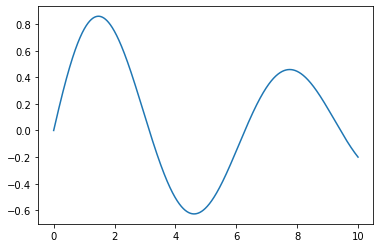

In [2]:
#1
N = 10000
x = np.linspace(0, 10, N+1)
y = np.exp(-x/10) * np.sin(x)
plt.plot(x,y)

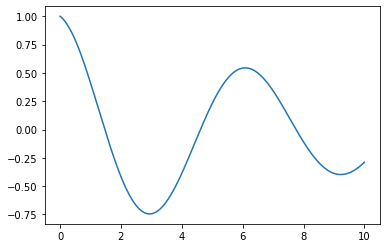

In [3]:
#2
dydx = np.gradient(y,x)
plt.plot(x, dydx)

In [4]:
#3
x[1:][dydx[1:] * dydx[:-1] < 0]

array([1.472, 4.613, 7.755])

Au ralenti...

In [5]:
# recherche des points d'inversion de signe de la dérivee (entre deux points consécutifs, pris en décalés)
sign_inversions = dydx[1:] * dydx[:-1] < 0
sign_inversions

array([False, False, False, ..., False, False, False])

In [6]:
sign_inversions.shape, x[1:].shape # car les points pris en décalés comportent une valeur de moins

((10000,), (10000,))

## Exercice 2
* Calculez la somme de tous les nombres entre 0 et 10000 sauf ceux divisibles par 4 ou par 7.
* Maximisez l'emploi d'instructions ensemblistes

In [7]:
not_divisible_by_4 = (np.arange(0,10001,1)%4!=0)

In [8]:
not_divisible_by_7 = (np.arange(0,10001,1)%7!=0)

In [9]:
neither_divisible_by_4_nor_by_7 = not_divisible_by_4 * not_divisible_by_7

In [10]:
all_useful_values = np.arange(0,10001)[neither_divisible_by_4_nor_by_7]

In [11]:
all_useful_values.sum()

32147142

In [12]:
# in oneline
np.arange(0,10001)[(np.arange(0,10001,1)%4!=0)*(np.arange(0,10001,1)%7!=0)].sum()

32147142

## Exercice 3

Soit la fonction polaire $r(\theta) = 1+\frac{3}{4}\sin(3 \theta)$ pour $0 \leq \theta \leq 2 \pi$

1. Tracez-la (passez-la en coordonnées cartésiennes pour cela)
2. Calculez l'aire grâce à la formule $A = \int_{0}^{2\pi} \frac{1}{2} r^2 d\theta$
3. Calculez la longueur de la courbe en utilisant la formule $L = \int_{0}^{2 \pi} \sqrt{r^2 + \left(\frac{dr}{d\theta}\right)^2} d\theta$

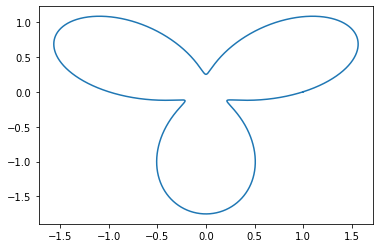

In [13]:
# 1
theta = np.linspace(0, 2*np.pi, 10000)
r = 1 + 3/4 * np.sin(3*theta)
x = r*np.cos(theta)
y = r * np.sin(theta)
plt.plot(x,y)

In [14]:
#2 (avec une intégration numérique par les rectangles)
dtheta = theta[1] - theta[0]
A = 1/2 * sum(r**2) * dtheta
A

4.025479778096348

In [15]:
#3
L = sum(np.sqrt(r**2 + np.gradient(r, theta)**2)) * dtheta
L

11.626531213518836

## Exercice 4

Soit la fonction $f(x,y) = e^{-(x^2+y^2)} \cdot \sin(x)$ pour $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$

1. Faîtes un tracé du contour de $f$ (*contour plot*)
2. Calculez le volume de $|f(x,y)|$ dans l'espace de définition de $f$
3. Calculez le volume de $|f(x,y)|$ restreint à une région définie par $\sqrt{x^2+y^2}>0.5$ 

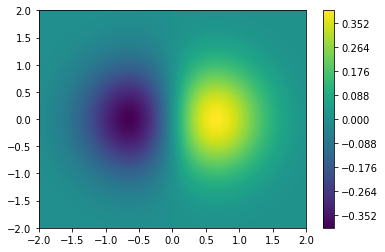

In [16]:
#1
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
xv, yv = np.meshgrid(x, y)
f = np.exp(-xv**2-yv**2) * np.sin(xv)
plt.contourf(xv,yv,f, levels=100)
plt.colorbar()

In [17]:
#2
dx, dy = np.diff(x)[0], np.diff(y)[0]
np.sum(np.abs(f)) * dx * dy

1.4861858145124311

In [18]:
# 3
area = xv**2+yv**2>0.25
np.sum(np.abs(f[area])) * dx * dy

1.3447652930203164